In [1]:

!pip install LAMP-core
#get_ipython().system(' pip3 install LAMP-core')



In [5]:
pip install LAMP-core

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tqdm

     |████████████████████████████████| 72 kB 2.5 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# ## Install LAMP package

# To query data in LAMP, we will use LAMP-py, a Python package which utilizes the LAMP API.
# 
# See LAMP-py documentation at https://github.com/BIDMCDigitalPsychiatry/LAMP-py for further API details.


In [1]:

import LAMP
import numpy as np
import pdb
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import io
from tqdm import tqdm
from scipy import stats
import itertools

font = {'size'   : 12}

matplotlib.rc('font', **font)

#
# There are two Researcher profiles that contain data on schizophrenia patients: NIH1 and NIH2
#
# Patients in NIH1 participated for 90 days 
# Patients in NIH2 participated (or are participating) for 1 year 
#

# In order to access data via the LAMP API, you must enter your credentials. 

# In order to query data from a given profile, you must enter in credentials specific to that profile
# 
# For NIH1:

LAMP.connect("tanvi_ranjan_nih1@lamp.com", "LAMPLAMP")

#
# To access data from the other profile (in this case, NIH2), you must reconnect with credentials for the second prof
#

LAMP.connect("tanvi_ranjan_nih2@lamp.com", "LAMPLAMP")


In [2]:

# Constants for each Researcher profile

# NIH1 
NIH1_RESEARCHER = "pd989rk5hzh2r4a84kha" #research profile

# Study profiles
# SZ patients are in two different profiles; COH1 contains patients who received 1 survey/day, and COH2 is 2 surveys/day 
NIH1_COH1 = "59mhxae3nbqc6vhq1m0d"
NIH1_COH2 = "48am6atdypxbqsnnd9sa"

NIH1_CONTROLS = "asyykh81k73452a9jdsm"

#NIH2
NIH2_RESEARCHER = "rzhd6cwztfqw0tagx0s5"

# Studies and participants in the NIH2 profile are organized differently than those in the NIH1 profile.
# In NIH2, each Study is a unique patient with one Participant (one study, "jz1g10pahpx6536x0waw", has data dispersed across two profiles)
#  

NIH2_STUDIES = LAMP.Study.all_by_researcher(NIH2_RESEARCHER)['data']
NIH2_STUDIES


[{'id': '1dvcvjem1z381rsshqrg', 'name': 'A B'},
 {'id': 'se8q72p1gasn2b3cvhtv', 'name': 'A H'},
 {'id': 'bvhtyxshxg4rm8vt7s94', 'name': 'L A'},
 {'id': '95mfa53g6ws924eev916', 'name': 'C J'},
 {'id': 'jz1g10pahpx6537x0waw', 'name': 'T H'},
 {'id': 'y772skbpyr35h597zmhy', 'name': 'Q S'},
 {'id': '0m8tme51bpxd2gchtax6', 'name': 'M L'},
 {'id': 'eercjgcf4ka5vgqs3awa', 'name': 'M V'},
 {'id': 'x30p4k407b5h1q3de8wc', 'name': 'K I'},
 {'id': '0ekq9kad5reqz1mfxgt2', 'name': 'A A'},
 {'id': 'cge9mcf1e1qw9y66djan', 'name': 'A S'},
 {'id': 'sy3b47x9evme1mj86pr7', 'name': 'K G'},
 {'id': 'ga1ezg9wxnxb371hvnp7', 'name': 'C R'},
 {'id': 'x027wp2ptt8vezxdk8z2', 'name': 'D R'},
 {'id': 't2ysqrwhzt6pb5hn2adm', 'name': 'S? '},
 {'id': 'kcdata9qbenrn7g6m0f1', 'name': 'AT '},
 {'id': '4qcy1r5yv2rzmxg5amgd', 'name': 'JJ H'},
 {'id': 'kwr39x3jx5hpy5ths7jc', 'name': 'J M'},
 {'id': '7ta32ear2s8934f42r5k', 'name': 'NJ '},
 {'id': 'wzx8210zhxb7y80xj6y3', 'name': 'W B'},
 {'id': '1xvxy5g8xt650rmb61hq', 'name':

In [3]:

# Sensor Data

# LAMP collects data from smartphone sensors. In LAMP, these sensors are specified as "Sensor" objects, and data from them are collected as "SensorEvents."
# For a comprehensive overview of smartphones sensors, please see https://docs.lamp.digital/Data-Types-99b045852c7b406f87c124b927fe95fa

# Previously we used the Beiwe framework () to collect sensor data. Thus, for some participants (including NIH1 and NIH2 patients), sensor data is stored as types "beiwe.accelerometer", "beiwe.gps", etc.
# A full list of Beiwe sensors that may be present for a given Participant:

beiwe_sensors = ["beiwe.accelerometer", "beiwe.gyro", "beiwe.magnetometer",
                 "beiwe.devicemotion", "beiwe.reachability", "beiwe.bluetooth",
                 "beiwe.calls", "beiwe.proximity", "beiwe.gps", 
                 "beiwe.power_state", "beiwe.texts", "beiwe.wifi"
                 "beiwe.app_log","beiwe.ios_log"]



In [4]:

# Query accelerometer data

# Accelerometer data points are SensorEvents with the origin "lamp.accelerometer" or "beiwe.accelerometer"


TEST_PARTICIPANT = LAMP.Participant.all_by_study(NIH2_STUDIES[6]['id'])['data'][0]['id']
#TEST_PARTICIPANT = LAMP.Participant.all_by_study('0m8tme51bpxd2gchtax6')['data'][0]['id']
print(TEST_PARTICIPANT)
participant_accel = LAMP.SensorEvent.all_by_participant(TEST_PARTICIPANT, 
                                                        origin="lamp.accelerometer")['data']

#Just show first five entries
participant_accel[:5];

# Query responses return a max of 1000 entries. If there are more than 1000 events for a given 
# sensor or activity, it will return the 1000 most recent events.
# 
#  To access more data —- or to query during a specific time range -— you must use the "_to" and "from" parameters.
#  (For example, set the "_to" parameter to the timestamp from the oldest event in the 1000 returned #

print(len(NIH2_STUDIES))

U35797573
75


In [5]:
# Excluding some IDs
# 1. Some participants withdrew from the study, so remove those
# 2. Some participants also have duplicate IDs

remove_ids = ['U1862723173', 'U4054795418', 'U518593080', 'U2590337187', 'U4012263787', 'U95554646', 'U54386853', 'U31470911','U4243820406', 'U90734530', 'U21988787', 'U77318711', 'U29630992', 'U3081777197', 'U2606672160', 'U7017359361', 'U2009788965', 'U7668038743', 'U5202709475', 'U4760330548'];
remove_idx = [];

duplicate_ids = ['U2433536796'];
for isubj in range(len(NIH2_STUDIES)):
    try:
        TEST_PARTICIPANT = LAMP.Participant.all_by_study(NIH2_STUDIES[isubj]['id'])['data'][0]['id'];
        if TEST_PARTICIPANT in remove_ids:
            remove_idx.append(isubj);

        if TEST_PARTICIPANT in duplicate_ids:
            pdb.set_trace();
    except:
        # print(f'Participant {isubj}: no data');
        remove_idx.append(isubj);

good_idx = np.delete(np.arange(0,len(NIH2_STUDIES)),remove_idx)
print(f'{len(remove_idx)} participants either have no data or were excluded from the study very early on, so only {len(good_idx)} remain')
print(f'Participant indices to remove: {remove_idx}');
print(f'Good participants: {good_idx}')
    

25 participants either have no data or were excluded from the study very early on, so only 50 remain
Participant indices to remove: [0, 1, 2, 3, 4, 7, 8, 9, 11, 12, 14, 17, 18, 19, 23, 24, 32, 37, 38, 43, 46, 47, 53, 54, 60]
Good participants: [ 5  6 10 13 15 16 20 21 22 25 26 27 28 29 30 31 33 34 35 36 39 40 41 42
 44 45 48 49 50 51 52 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72
 73 74]


In [6]:
##### Survey data analysis
'''
1. Extract survey data
2. Determine all possible responses to each question and code individual responses
3. Code responses to PANSS scores
3b. Convert data to MATLAB
4. Run an ANOVA
5. Do G-theory and D-theory analysis
'''


'\n1. Extract survey data\n2. Determine all possible responses to each question and code individual responses\n3. Code responses to PANSS scores\n3b. Convert data to MATLAB\n4. Run an ANOVA\n5. Do G-theory and D-theory analysis\n'

In [7]:
# Make a repository of questions
# Subj no 6 has most questions

isubj = 6;
survey = LAMP.Activity.all_by_study(NIH2_STUDIES[isubj]['id'])['data']
ques_all = pd.DataFrame();
for act in survey:
    if act['spec'] == 'lamp.survey':
        aa = pd.DataFrame(act['settings'])
        aa.insert(0,'Name', act['name'])
        ques_all = ques_all.append(aa, ignore_index=True);
print(ques_all)


              Name                                            options  \
0             Mood                                               None   
1             Mood                                               None   
2             Mood                                               None   
3             Mood                                               None   
4             Mood                                               None   
5             Mood                                               None   
6             Mood                                               None   
7             Mood                                               None   
8             Mood                                               None   
9            Sleep                                               None   
10           Sleep                                               None   
11           Sleep                                               None   
12         Anxiety                                 

In [8]:
# Convert all text in options to capitalize() format so case is not a problem when finding index of answers
for i,j in enumerate(ques_all['options']):
    if not(j is None):
        tmp_opt = [opt.capitalize() for opt in ques_all['options'][i]]
        #print(tmp_opt)
        ques_all['options'][i] = tmp_opt;

In [9]:
# Positive and Negative Syndrome Scale (PANSS)

# ------------ POSITIVE SCALE ------------
# Delusions, Conceptual disorganization, Hallucinations, Excitement, Grandiosity, Suspiciousness/persecution, Hostility

# ------------ NEGATIVE SCALE ------------
# Blunted affect, Emotional withdrawal, Poor rapport, Passive/apathetic social withdrawal, Difficulty in abstract thinking, Lack of spontaneity and flow of conversation, Stereotyped thinking

# ------------ GENERAL SCALE -------------
# Somatic concern, Anxiety, Guilt feelings, Tension, Mannerisms and posturing, Depression, Motor retardation, Uncooperativeness, Unusual thought content, Disorientation, Poor attention, Lack of judgment and insight, Disturbance of volition, Poor impulse control, Preoccupation, Active social avoidance



In [10]:
# Converting survey questions into PANSS scores - Done manually for now

# ------------ POSITIVE SCALE ------------
# Delusions: Today I feel I have special powers [Psychosis] Q28
# Conceptual disorganization: Today I have trouble focusing or concentrating [Mood] Q6
# Hallucinations: Today I have heard voices or saw things others cannot [Psychosis] Q26
# Excitement:
# Grandiosity:
# Suspiciousness/persecution: 'Today I feel people are watching me' [Psychosis] Q29
# Hostility: 'Today I feel people are against me' [Psychosis] Q30

# ------------ NEGATIVE SCALE ---------------------------
# Blunted effect:
# Emotional withdrawal: Today I feel little interest or pleasure [Mood] Q0
# Poor rapport:           Today I had arguments with other people  [SOCIAL] Q21
# Passive/apathetic social withdrawal: Today I felt uneasy with groups of people [Social] or  Social              Today I preferred to spend time alone   [Social] Q20, 23
# Difficulty in abstract thinking:
# Lack of spontaneity and flow of conversation:
# Stereotyped thinking:

# ------------ GENERAL SCALE ---------------------------
# Somatic concern (extreme focus on physical symptoms):
# Anxiety: Today I feel anxious [Anxiety] Q12
# Guilt feelings: Today I feel bad about myself or that I have let others down [Mood] Q5
# Tension: Today I cannot stop worrying OR Today I am worrying too much about different things [Anxiety] Q13,14
# Mannerisms and posturing:
# Depression: Today I feel depressed [Mood] Q1
# Motor retardation: Today I feel too slow or too restless [Mood] Q7
# Uncooperativeness: Today I have trouble focusing or concentrating [Mood] Q6
# Unusual thought content: Today I feel I have special powers [Psychosis] Q28
# Disorientation: Today I have thoughts racing through my head [Psychosis] Q27
# Poor attention: Today I have trouble focusing or concentrating [Mood] Q6
# Lack of judgment and insight:
# Disturbance of volition:
# Poor impulse control:
# Preoccupation: Today I have trouble relaxing [Anxiety] Q15
# Active social avoidance: Today I preferred to spend time alone [Social] Q20

panss_idx = np.empty(shape=(3,),dtype='object')
panss_idx[0] = np.array([28, 6, 26, 29, 30]); # Positive scale
panss_idx[1] = np.array([0, 21, 20]); # Negative scale
panss_idx[2] = np.array([12, 5, 13, 1, 7, 6, 28, 27, 6, 15, 20]); # General scale

In [11]:
# Identify indices for each type of question

score_list = ['Mood', 'Sleep', 'Anxiety', 'Psychosis','Social positive','Social negative'];
color_list = ['blue','orange','green','red','purple','brown'];

idx_all = np.empty(shape=(len(score_list),),dtype='object');
for i_item, item in enumerate(score_list[:-2]):
    idx_all[i_item] = np.where(ques_all['Name'] == item)[0];
    print(item)
idx_all[len(score_list)-2] = np.array([19,22,24]); #Indices for 'Social positive'
idx_all[len(score_list)-1] = np.array([20,21,23]); #Indices for 'Social negative'


Mood
Sleep
Anxiety
Psychosis


In [12]:
# Function to map questions related to 'Sleep' which are worded slightly differently across patients
def slightly_diff_ques(ques_all,q):

    # Check for sleep Q1: Last night/Today I had trouble falling asleep
    q1 = 'had trouble falling asleep'
    if q.endswith(q1):
        return np.where(ques_all['text'].str.endswith(q1))[0]

    # Check for sleep Q2: Last night/Today I had trouble staying asleep
    q2 = 'had trouble staying asleep'
    if q.endswith(q2):
        return np.where(ques_all['text'].str.endswith(q2))[0];

    # Check for sleep Q3: This morning/Today I had trouble staying asleep
    q3 = 'I was up earlier than I wanted';
    if q.endswith(q3):
        return np.where(ques_all['text'].str.endswith(q3))[0];

    # If no match, return empty array
    return np.array([])



In [13]:
# Make instances of the dataframe for each participant for each survey
nsubj = len(good_idx); nques = len(ques_all);
resp, timest, ID = [np.empty(shape=(nsubj,),dtype='object') for _ in range(3)]; 
timest = np.empty(shape=(nsubj,),dtype='object');
nsur = np.zeros(shape=(nsubj,),dtype='int');
count=0;
for isubj in range(nsubj): 
    istudy = good_idx[isubj]; # Only indices in the good_idx are to be included in any analysis
    try:
        participant = LAMP.Participant.all_by_study(NIH2_STUDIES[istudy]['id'])['data'][0]['id'];
        survey = LAMP.ActivityEvent.all_by_participant(participant)['data'];
        ID[isubj] = participant;
    except IndexError:
        survey=[];
        
    nsurvey = len(survey);
    #print(f'{isubj:d} has len(survey)={len(survey):d}');
    resp[isubj] = np.zeros(shape=(nsurvey,),dtype='object');
    timest[isubj] = np.empty(shape=(nsurvey,),dtype='object');
    nsur[isubj] = nsurvey;
    for isurvey, sur in enumerate(survey): 
        resp[isubj][isurvey] = np.zeros(shape=(nques,),dtype='int')-1;
        allq = sur['temporal_slices'];
        for iq in allq:
            q = iq['item']; # record question
            if 'value' in iq:
                tmp_ans = iq['value']; # record answer
            else:
                tmp_ans = -1;

            # find index of question in questionnaire 
            which_ques = np.where(ques_all['text'] == q)[0]; 

            # Questions on sleep are worded separately across participants, so make room for that
            if (not len(which_ques)) and isinstance(q,str):
                which_ques = slightly_diff_ques(ques_all,q);

            # Exception for q32 - 
            # 1: text is not EXACTLY the same, so need a substring match, 
            # 2: valid answers are 'Yes' or 'No', but are not present in the 'options', so code them separately 
            if isinstance(q,str) and len(q)>5 and ques_all['text'][32].find(q[:-1]) >=0:
                which_ques=32; 

                if tmp_ans.find('Yes')>=0:
                    tmp_ans=1;
                elif tmp_ans.find('No')>=0:
                    tmp_ans=0;
                else:
                    tmp_ans=-1;
 
            # Exception for q33 - 
            # it's a text q asking: 'Use this space to write your thoughts and feelings'
            # Just ignore it for now, but this can be used later - TR, Jan 11, 2020
            if which_ques < 33: 
                try:
                    ans = -1 if tmp_ans is None else int(tmp_ans)
                except ValueError:
                    # ------ This for debuggin', delete later - TR, Jan 11, 2020 -------
                    if isubj==100 and isurvey ==199:
                        count=count+1;
                        if count>1:
                            pdb.set_trace();
                    # -----------------------------------------------

                    try:
                        ans_idx = ques_all['options'][which_ques].str.index(tmp_ans.capitalize()); 
                        if isubj==100:
                            print(f'subject: {isubj:d}, survey {isurvey:d}, ques:{q},{ans_idx}');
                            pdb.set_trace();
                        ans_idx = ans_idx.to_list()[0]; 
                        ans = -1 if ans_idx is None else int(ans_idx)
                    except ValueError:
                        ans=-1; 

                resp[isubj][isurvey][ques_all['text'] == q] = ans;

                #convert from ms to timestamp
                timest[isubj][isurvey] = datetime.datetime.fromtimestamp(sur['timestamp']/1e3); 

print('------------------ Done ----------------------')


/Users/tanviranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


------------------ Done ----------------------


In [14]:
# Aggregate all questions from one survey day for each participant
ndays = np.zeros(shape=(nsubj,),dtype='int')-1;
true_resp, unique_dates = [np.empty(shape=(nsubj,),dtype='object') for i in range(2)];

for isubj in range(nsubj):
    days_all=np.zeros(shape=(nsur[isubj],),dtype='object')

    for isur in range(nsur[isubj]):
        if timest[isubj][isur] is not None:
            days_all[isur] = timest[isubj][isur].date();

    # Get unique dates
    df = pd.DataFrame(days_all,columns=['date']); 
    unique_dates[isubj] = df['date'].unique(); unique_dates[isubj]=np.ma.masked_equal(unique_dates[isubj],0).compressed();
    ndays[isubj] = len(unique_dates[isubj])

    true_resp[isubj] = np.zeros(shape=(len(unique_dates[isubj]),len(ques_all)),dtype='float')-1;
    for i,dat in enumerate(unique_dates[isubj]):
        idx = np.where(days_all == dat)[0];
        for i_idx in idx:
            # If multiple surveys on same day, either: 
            # 1) take average
            # true_resp[i,resp[isubj][i_idx]>=0] = 0.5*(true_resp[i,resp[isubj][i_idx]>=0]>=0 + resp[isubj][i_idx][resp[isubj][i_idx]>=0]);
            # 2) take latest survey response
            if isubj == 100 and i ==4:
                pdb.set_trace();
            true_resp[isubj][i,resp[isubj][i_idx]>=0] = resp[isubj][i_idx][resp[isubj][i_idx]>=0];
        
        true_resp[isubj][i,true_resp[isubj][i,]<0] = float('nan');
        


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/days_per_subj.png'

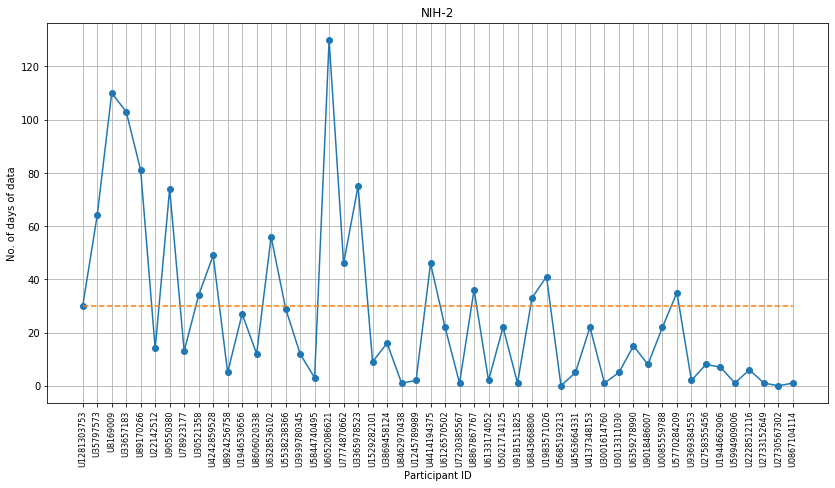

In [15]:
days_thres = 30;
f=plt.figure(figsize=(14,7)); plt.plot(ID, ndays,'o-'); plt.plot(days_thres*np.ones_like(ndays),'--'); plt.xticks(rotation='vertical', size=8); plt.grid()
plt.xlabel('Participant ID'); plt.ylabel('No. of days of data'); plt.title('NIH-2'); plt.savefig('Figures/days_per_subj.png'); plt.show(); 

sort_idx = np.argsort(ndays); #np.arange(0,len(ndays));
f=plt.figure(figsize=(14,7)); plt.plot(ID[sort_idx], ndays[sort_idx],'o-'); plt.plot(days_thres*np.ones_like(ndays),'--'); plt.xticks(rotation='vertical', size=8); plt.grid()
plt.xlabel('Participant ID'); plt.ylabel('No. of days of data'); plt.title('NIH-2'); plt.savefig('Figures/days_per_subj_sorted.png'); plt.show(); 

In [16]:
# Survey completeness
survey_completeness = np.empty(shape=(nsubj,),dtype='object');
for isubj in tqdm(range(nsubj)): 
    survey_completeness[isubj] = np.zeros(shape=(ndays[isubj],len(score_list)));
    for iday in range(ndays[isubj]):
        for iscore in range(len(score_list)):
            survey_completeness[isubj][iday,iscore] = 1-np.mean(np.isnan(true_resp[isubj][iday,idx_all[iscore]]));

# which_subj = 16;
# print(survey_completeness[which_subj])
# print(true_resp[which_subj])

100%|██████████| 50/50 [00:00<00:00, 286.55it/s]


/Users/tanviranjan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


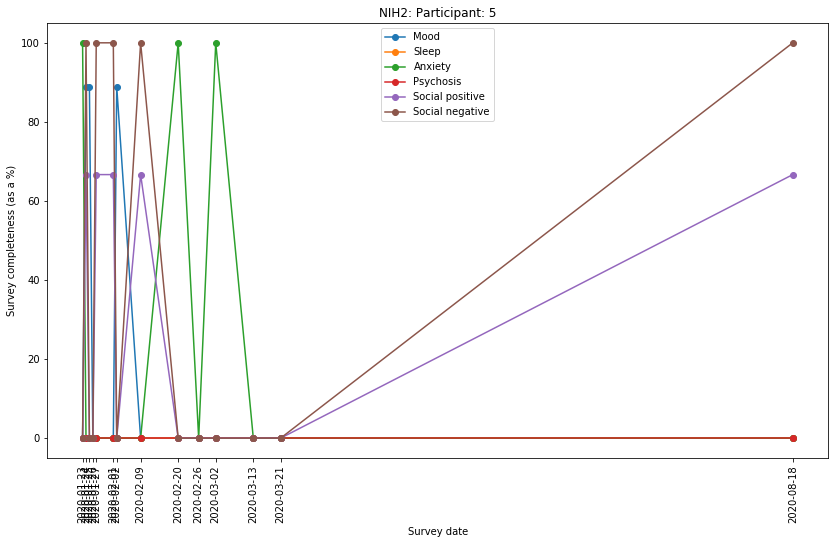

In [17]:
# Plot survey completion
which_subj = 5;
f=plt.figure(figsize=(14,8)); 
for iscore in range(len(score_list)):
    plt.plot(unique_dates[which_subj],survey_completeness[which_subj][:,iscore]*100,'o-',label=score_list[iscore]);
plt.xticks(unique_dates[which_subj], rotation='vertical')
plt.xlabel('Survey date'); plt.ylabel('Survey completeness (as a %)'); plt.legend(); plt.title(f'NIH2: Participant: {which_subj:d}'); plt.savefig(f'Figures/survey_completeness_{which_subj:d}'); plt.show()

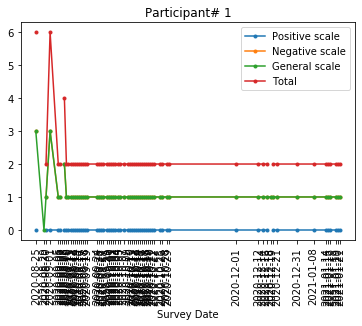

In [18]:
# Function to calculate and plot PANSS score 
def panss_score(true_resp, panss_idx):
    nsubj = len(true_resp);
    panss = np.empty(shape=(nsubj,),dtype='object');
    for isubj in range(nsubj):
        panss[isubj] = np.zeros(shape=(len(true_resp[isubj]),len(panss_idx)))-1;

        for ipanss in range(len(panss_idx)):
            for iday in range(len(true_resp[isubj])):
                panss[isubj][iday,ipanss] = np.nansum(true_resp[isubj][iday,panss_idx[ipanss]]);
                if np.all(np.isnan(true_resp[isubj][iday,panss_idx[ipanss]])):
                    panss[isubj][iday,ipanss] = float('nan')

    return panss;

panss = panss_score(true_resp, panss_idx); 

which_subj = 1;
panss_desc = ['Positive scale','Negative scale','General scale'];
f=plt.figure();
for i in range(len(panss_desc)):
    plt.plot(unique_dates[which_subj],panss[which_subj][:,i],'.-',label=panss_desc[i]); 
plt.plot(unique_dates[which_subj], np.sum(panss[which_subj],axis=1),'.-',label='Total'); 
plt.xticks(unique_dates[which_subj], rotation='vertical')
plt.legend(); plt.xlabel('Survey Date'); plt.xticks(rotation='vertical'); plt.title(f'Participant# {which_subj}');
plt.savefig('Figures/panss_1.png') 

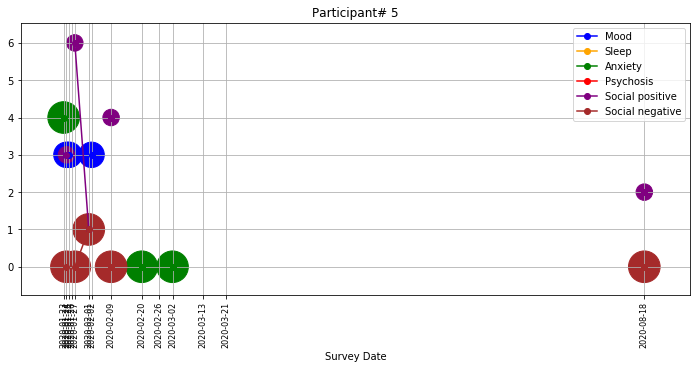

In [19]:
# Function to calculate mood, sleep, anxiety, social, psychosis scores
# TODO: Check actual scores carefully

def all_score(true_resp, idx_all):

    # idx_all is (5,) array with each element differently sized
    nscores = len(idx_all); nsubj=len(true_resp);
    score = np.empty(shape=(nsubj,),dtype='object');

    for isubj in range(nsubj):
        ndays = len(true_resp[isubj])
        score[isubj] = np.empty(shape=(ndays,nscores))
        for iscore in range(nscores):
            for iday in range(ndays):
                score[isubj][iday, iscore] = np.nansum(true_resp[isubj][iday,idx_all[iscore]]);
                # If there is no data at all, keep it nan
                if np.all(np.isnan(true_resp[isubj][iday,idx_all[iscore]])):
                    score[isubj][iday,iscore] = float('nan')
            

    return score


score = all_score(true_resp,idx_all);

more_data = np.where(ndays>=days_thres)[0];

which_subj=5;
f=plt.figure(figsize=(12,5));
for i_item, item in enumerate(score_list):
    plt.plot(unique_dates[which_subj],score[which_subj][:,i_item],'o-',label=item,color=color_list[i_item]); 
    kk=list(20*50**(survey_completeness[which_subj][:,i_item]));
    plt.scatter(unique_dates[which_subj],score[which_subj][:,i_item],c=color_list[i_item], s=kk); 
    
plt.xticks(unique_dates[which_subj],size=8,rotation='vertical'); plt.grid();
plt.legend(); plt.xlabel('Survey Date'); plt.xticks(); plt.title(f'Participant# {which_subj}');
plt.savefig(f'Figures/sur_score_{which_subj:d}.png') 
            

In [20]:
#unique_dates (datetime64 type) cannot be saved as a mat file, so convert to string
unique_dates_mat = np.empty_like(unique_dates)
for i in range(len(unique_dates)):
    unique_dates_mat[i] = np.empty_like(unique_dates[i]);
    for j,dd in enumerate(unique_dates[i]):
        unique_dates_mat[i][j] = dd.strftime("%d-%b-%Y");

In [21]:
# Convert Data from Python to MATLAB
mat_data={'true_resp':true_resp,'idx_all':idx_all,'ques_all':ques_all,'unique_dates_mat':unique_dates_mat};
io.savemat('NIH2.mat',mat_data);
print('---------------------------- Done ---------------------------')

---------------------------- Done ---------------------------


In [22]:
def corr_with_nan(A,B):
    a=np.ma.masked_invalid(A);
    b=np.ma.masked_invalid(B);
    msk = (~a.mask & ~b.mask);
    r,p=stats.pearsonr(a[msk],b[msk]); 
    return r, p

/Users/tanviranjan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


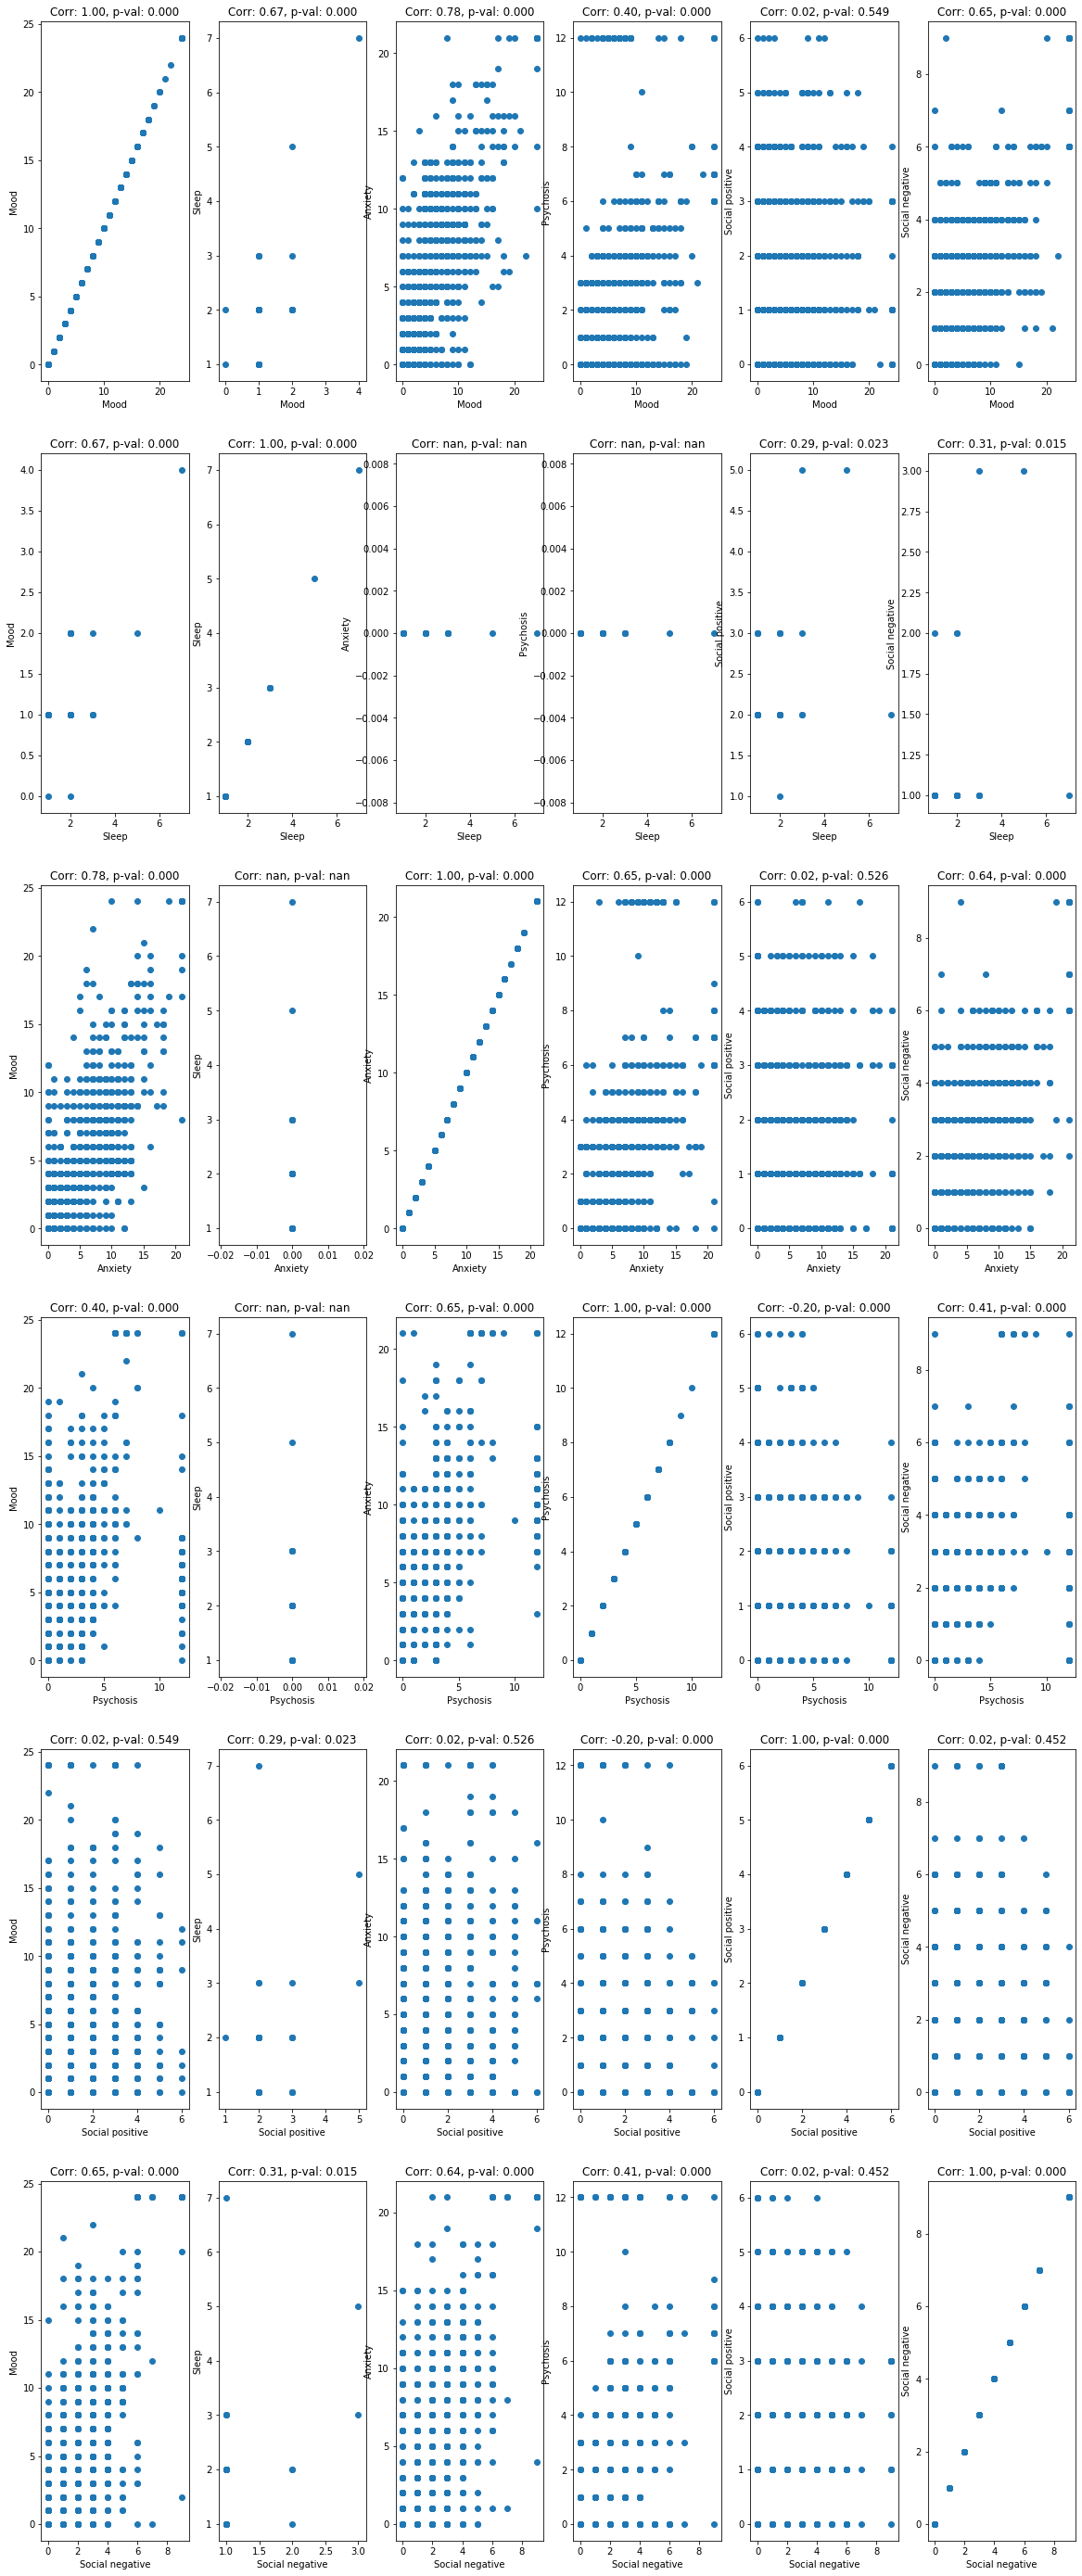

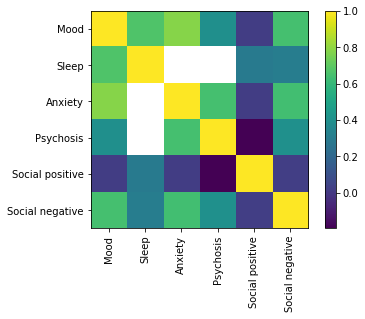

In [23]:
''' Check correlations between scores of each type, ie., Mood vs Anxiety, Anxiety vs Sleep etc
'''

all_scores = np.empty(shape=(len(score_list),),dtype='object');

# Collect scores across all patients
for i_score in range(len(score_list)):
    kk=[];
    for i_subj in range(nsubj):
        kk.append(score[i_subj][:,i_score].tolist());
    all_scores[i_score] = kk;

# This loop makes all_scores a weird list of lists. Use 'itertools' to unpack that
for i_score in range(len(score_list)):
    all_scores[i_score] = list(itertools.chain(*all_scores[i_score]));

# Measure correlation across individual pairs
k=1; plt.figure(figsize=(20,50));
[corr_scores, p_corr] = [np.zeros(shape=(len(score_list), len(score_list))) for _ in range(2)]
for i_score in range(len(score_list)):
    for j_score in range(len(score_list)):
        # if i_score==1 and j_score==2:
        #     pdb.set_trace();
        [corr_scores[i_score,j_score],p_corr[i_score,j_score]] = corr_with_nan(all_scores[i_score], all_scores[j_score]);
        plt.subplot(6,6,k); plt.scatter(all_scores[i_score], all_scores[j_score]); plt.xlabel(score_list[i_score])
        plt.ylabel(score_list[j_score]); 
        plt.title(f'Corr: {corr_scores[i_score,j_score]:0.2f}, p-val: {p_corr[i_score,j_score]:0.3f}');
        k=k+1;
plt.savefig('Figures/Corr.png')
plt.show();

# Show correlation values as an image
f=plt.figure();  
plt.imshow(corr_scores); plt.colorbar(); plt.xticks(np.arange(0,len(score_list)),score_list,rotation='vertical');
plt.yticks(np.arange(0,len(score_list)),score_list); plt.savefig('Figures/corr_img.png')
plt.show();



[-1000   936  -934 ...     0    -2    -1]


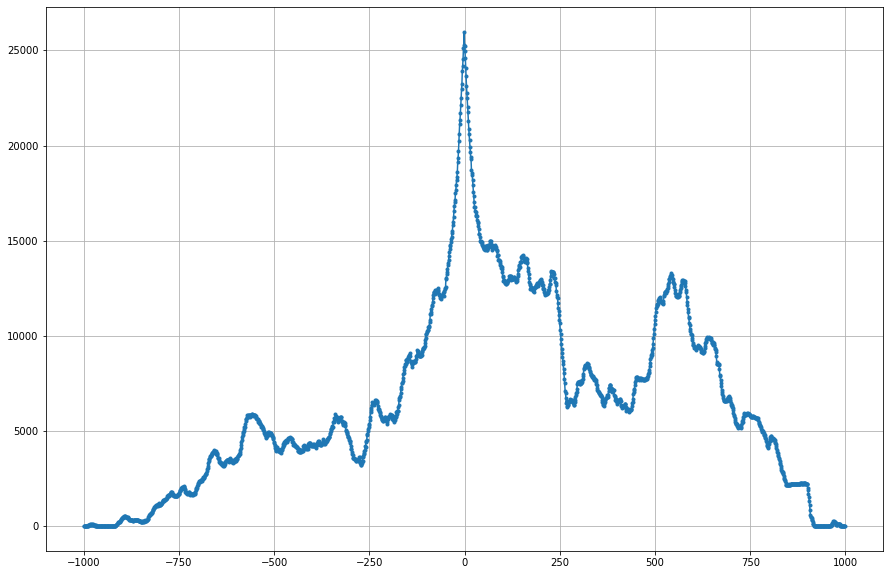

In [24]:
''' Do cross-correlation to infer causality'''
''' That won't work because all these scores are just combined across all participants, the temporal sequence is not really preserved. So need to do causality test on a per-participant basis'''
A=all_scores[2]; B=all_scores[3];
a=np.ma.masked_invalid(A);
b=np.ma.masked_invalid(B);
msk = (~a.mask & ~b.mask);
tanvi = np.correlate(a=a[msk],v=b[msk],mode='full');

lags = np.arange(-len(tanvi)//2,len(tanvi)//2);
lagmax = np.argsort(tanvi); print(lags[lagmax])

f=plt.figure(figsize=(15,10)); plt.plot(lags,tanvi,'.-'); plt.grid(); plt.show();

In [25]:
for isubj in range(nsubj):
    survey = LAMP.Activity.all_by_study(NIH2_STUDIES[isubj]['id'])['data']
    tmp_ques_all = pd.DataFrame();
    for act in survey:
        if act['spec'] == 'lamp.survey':
            aa = pd.DataFrame(act['settings'])
            aa.insert(0,'Name', act['name'])
            tmp_ques_all = tmp_ques_all.append(aa, ignore_index=True);
    print(f'------------------ Subj:# {isubj} ------------------------')
    print(tmp_ques_all[9:12])
    print(f'----------------------------------------------------------')

------------------ Subj:# 0 ------------------------
Empty DataFrame
Columns: []
Index: []
----------------------------------------------------------
------------------ Subj:# 1 ------------------------
          Name options                                     text    type
9   Depression    None                   I had trouble sleeping  likert
10  Depression    None       I feel tired or have little energy  likert
11  Depression    None  I have a poor appetite or am overeating  likert
----------------------------------------------------------
------------------ Subj:# 2 ------------------------
     Name options                                         text    type
9   Sleep    None      Last night I had trouble falling asleep  likert
10  Sleep    None      Last night I had trouble staying asleep  likert
11  Sleep    None  This morning I was up earlier than I wanted  likert
----------------------------------------------------------
------------------ Subj:# 3 ------------------------
 

------------------ Subj:# 23 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    None  Today I was up earlier than I wanted  likert
----------------------------------------------------------
------------------ Subj:# 24 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    None  Today I was up earlier than I wanted  likert
----------------------------------------------------------
------------------ Subj:# 25 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    Non

------------------ Subj:# 46 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    None  Today I was up earlier than I wanted  likert
----------------------------------------------------------
------------------ Subj:# 47 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    None  Today I was up earlier than I wanted  likert
----------------------------------------------------------
------------------ Subj:# 48 ------------------------
     Name options                                  text    type
9   Sleep    None    Today I had trouble falling asleep  likert
10  Sleep    None    Today I had trouble staying asleep  likert
11  Sleep    Non

In [32]:
#### PASSIVE DATA ANALYSIS ######

In [26]:
fname = 'U35797573_gps.csv'; #'nih2_gps/U35797573_gps.csv';
df = pd.read_csv(fname); print(df)

        Unnamed: 0      timestamp   latitude  longitude
0                0  1611785367867  42.283373 -71.064843
1                1  1611785367862  42.283373 -71.064843
2                2  1611785338854  42.283373 -71.064841
3                3  1611785338853  42.283373 -71.064841
4                4  1611785332900  42.283373 -71.064843
5                5  1611785332889  42.283373 -71.064843
6                6  1611785314873  42.283373 -71.064843
7                7  1611785314865  42.283373 -71.064843
8                8  1611785309899  42.283373 -71.064844
9                9  1611785309895  42.283373 -71.064844
10              10  1611785292870  42.283372 -71.064836
11              11  1611785292869  42.283372 -71.064836
12              12  1611785286875  42.283372 -71.064837
13              13  1611785286874  42.283372 -71.064837
14              14  1611785266872  42.283372 -71.064838
15              15  1611785266868  42.283372 -71.064838
16              16  1611785246882  42.283372 -71

In [34]:
df.to_pickle("nih2_gps/exdat.pkl")

In [42]:
pd.read_csv('nih2_gps/U35797573_gps.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df = df.iloc[::-1]
df = df.reset_index(drop=True)
tlist = []
for i in range(1,len(df)):
    t = df['timestamp'][i] - df['timestamp'][i-1]
    tlist.append(t.seconds)
print(np.median(tlist)); print(np.mean(tlist));

7.0
8.053738536090457


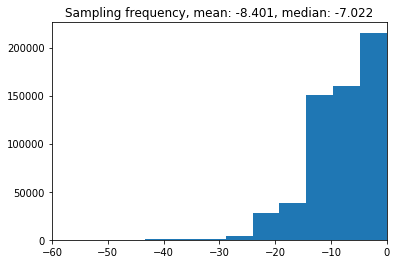

In [45]:
plt.hist(np.diff(df['timestamp']/1e3),bins=10000); plt.xlim([-60,0]);
mn = np.mean(np.diff(df['timestamp']/1e3)); md = np.median(np.diff(df['timestamp']/1e3))
plt.title(f'Sampling frequency, mean: {mn:1.3f}, median: {md:1.3f}');
plt.show()

In [78]:
# Add additional columns to the data frame with day-time and weekday
dat_colm = pd.to_datetime(df['timestamp'],unit='ms');
weekday = df['Date-Time'].dt.day_name(); df.insert(3,'Day of week',weekday,True)
#df.insert(2,'Date-Time',dat_colm); 
#df.drop(columns=['Date','date']); #del df['date']
#del df['Day of week']
print(df.head())

   Unnamed: 0      timestamp               Date-Time Day of week   latitude  \
0           0  1611785367867 2021-01-27 22:09:27.867   Wednesday  42.283373   
1           1  1611785367862 2021-01-27 22:09:27.862   Wednesday  42.283373   
2           2  1611785338854 2021-01-27 22:08:58.854   Wednesday  42.283373   
3           3  1611785338853 2021-01-27 22:08:58.853   Wednesday  42.283373   
4           4  1611785332900 2021-01-27 22:08:52.900   Wednesday  42.283373   

   longitude  
0 -71.064843  
1 -71.064843  
2 -71.064841  
3 -71.064841  
4 -71.064843  


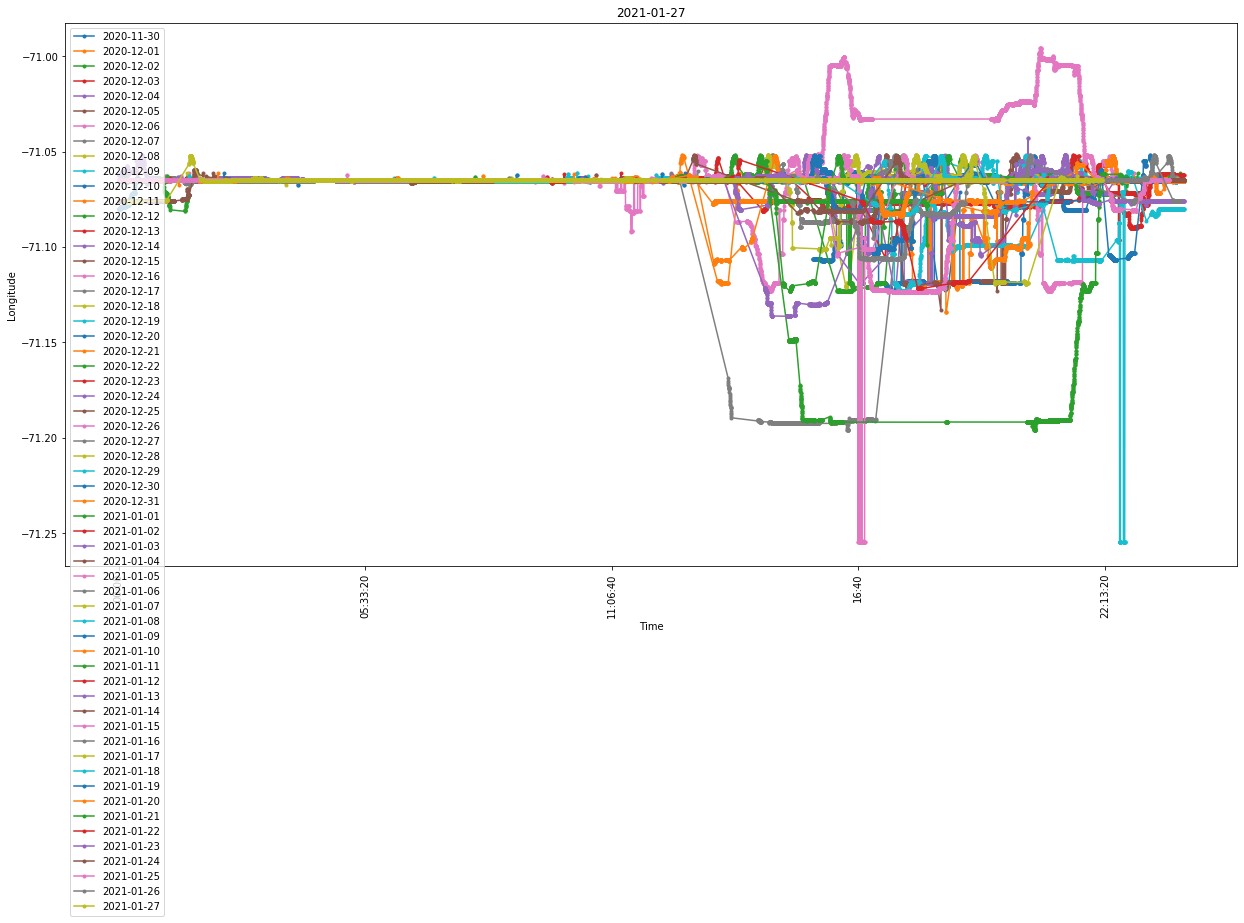

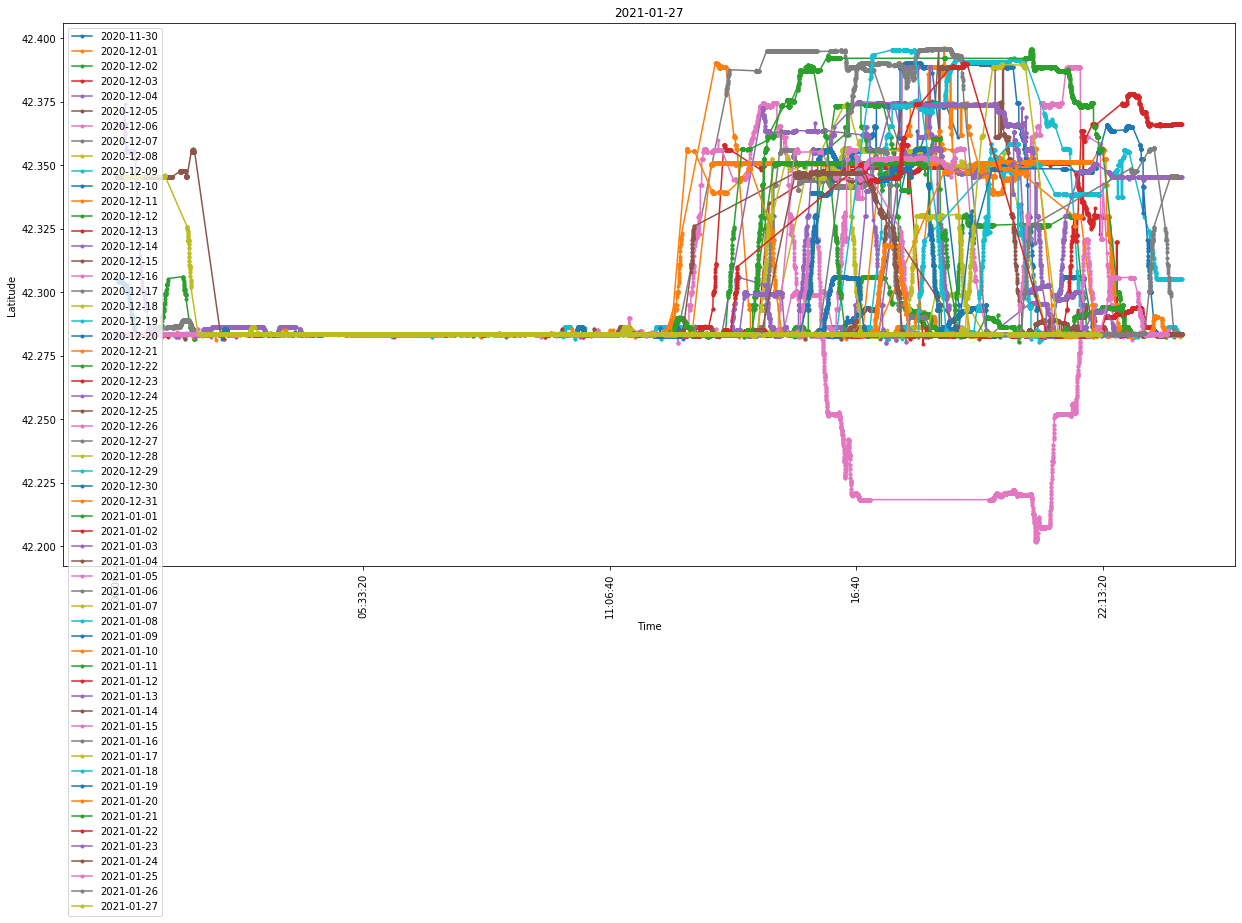

In [95]:
# Find lat. long. on one day
f=plt.figure(figsize=(21,10))
days = df['Date-Time'].dt.date; 
for iday,gday in enumerate(np.unique(days)):
    lon = df['longitude'][df['Date-Time'].dt.date == gday];
    tm = df['Date-Time'][df['Date-Time'].dt.date == gday].dt.time;
    #plt.figure(figsize=(21,10));
    plt.plot(tm, lon,'.-',label=gday); plt.xticks(rotation='vertical');
    plt.ylabel('Longitude'); plt.xlabel('Time'); plt.title(f'{gday}')
plt.legend(); plt.show();


f=plt.figure(figsize=(21,10))
days = df['Date-Time'].dt.date; 
for iday,gday in enumerate(np.unique(days)):
    lon = df['latitude'][df['Date-Time'].dt.date == gday];
    tm = df['Date-Time'][df['Date-Time'].dt.date == gday].dt.time;
    #plt.figure(figsize=(21,10));
    plt.plot(tm, lon,'.-',label=gday); plt.xticks(rotation='vertical');
    plt.ylabel('Latitude'); plt.xlabel('Time'); plt.title(f'{gday}')
plt.legend(); plt.show();

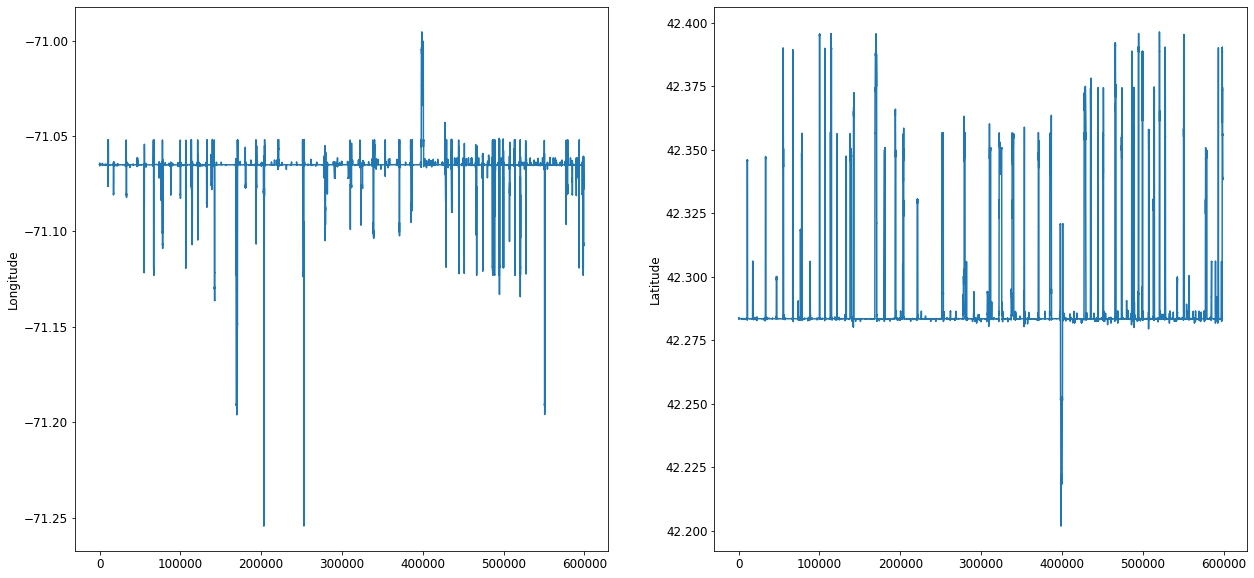

In [38]:
f=plt.figure(figsize=(21,10)); 
plt.subplot(1,2,1); plt.plot(df['longitude']); plt.ylabel('Longitude');

plt.subplot(1,2,2); plt.plot(df['latitude']); plt.ylabel('Latitude');

In [37]:
# Read in the passive data for all patients

## Extra variable assignments to send to Ryan D
NIH2_RESEARCHER = "rzhd6cwztfqw0tagx0s5"  
NIH2_STUDIES = LAMP.Study.all_by_researcher(NIH2_RESEARCHER)['data']
good_idx = array([ 5,  6, 10, 13, 15, 16, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 34,
       35, 36, 37, 40, 41, 42, 43, 45, 46, 50, 51, 52, 53, 56, 57, 58, 59,
       60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]); # to send to Ryan D
nsubj = len(good_idx);

participant_accel = np.empty(shape=(nsubj,),dtype='object')
for i_subj in tqdm(range(nsubj),position=0,leave=True):
    istudy = good_idx[i_subj];
    PARTICIPANT = LAMP.Participant.all_by_study(NIH2_STUDIES[istudy]['id'])['data'][0]['id'];
    xx2=np.array([]);
    
    print(f'----------------------- {i_subj} ----------------------')
    kk = LAMP.SensorEvent.all_by_participant(PARTICIPANT, origin="lamp.accelerometer")
    while(len(kk['data'])>1):
        
        # Update time
        nexttime = kk['data'][-1]['timestamp']; st = kk['data'][0]['timestamp']; nn=len(kk['data']);
        #print(f'[0 time]: {st}, [end time]: {nexttime}, npts: {nn}')
        
        # Append to collection
        xx = np.array(kk['data']);
        xx2 = np.hstack((xx2,xx));
        
        # Retrieve data counting backwards from start of survey
        kk = LAMP.SensorEvent.all_by_participant(PARTICIPANT, origin="lamp.accelerometer", to=nexttime);
        
    participant_accel[i_subj] = xx2;
    
    

  1%|▏         | 1/72 [24:15<28:42:47, 1455.88s/it]----------------------- 1 ----------------------
> <ipython-input-37-54d7ef49d8b4>(4)<module>()
      2 
      3 participant_accel = np.empty(shape=(nsubj,),dtype='object')
----> 4 for i_subj in tqdm(range(nsubj),position=0,leave=True):
      5     PARTICIPANT = LAMP.Participant.all_by_study(NIH2_STUDIES[isubj]['id'])['data'][0]['id'];
      6     xx2=np.array([]);

  1%|▏         | 1/72 [49:16<58:18:42, 2956.65s/it]


BdbQuit: 

In [7]:


# '_from' and 'to' are UNIX timestamps to specify a time window
# 
participant_accel_tr = LAMP.SensorEvent.all_by_participant(TEST_PARTICIPANT, origin="beiwe.accelerometer", _from='1575487400000', to='1575487450000')
participant_accel_tr['data'][:5]


[{'timestamp': 1575487447640,
  'sensor': 'beiwe.accelerometer',
  'data': {'accuracy': 'unknown',
   'x': 0.0373687744140625,
   'y': 0.020538330078125,
   'z': -0.993865966796875}},
 {'timestamp': 1575487447539,
  'sensor': 'beiwe.accelerometer',
  'data': {'accuracy': 'unknown',
   'x': 0.0358123779296875,
   'y': 0.0201568603515625,
   'z': -0.9930572509765625}},
 {'timestamp': 1575487447439,
  'sensor': 'beiwe.accelerometer',
  'data': {'accuracy': 'unknown',
   'x': 0.0367584228515625,
   'y': 0.0227203369140625,
   'z': -0.9905853271484375}},
 {'timestamp': 1575487447338,
  'sensor': 'beiwe.accelerometer',
  'data': {'accuracy': 'unknown',
   'x': 0.0370941162109375,
   'y': 0.019775390625,
   'z': -0.9944915771484375}},
 {'timestamp': 1575487447237,
  'sensor': 'beiwe.accelerometer',
  'data': {'accuracy': 'unknown',
   'x': 0.0363616943359375,
   'y': 0.020050048828125,
   'z': -0.9917449951171875}}]

In [8]:
# ## Query surveys

# ##### Surveys are ActivityEvents, with each survey type defined as an Activity 
# 
# ##### 'duration' is the survey completion time, in ms
# 
# ##### 'activity' is the Activity id
# 
# ##### 'temporal_slices' contains responses for each survey question


In [1]:


LAMP.ActivityEvent.all_by_participant(TEST_PARTICIPANT)['data'];



NameError: name 'LAMP' is not defined

In [9]:
pip 



